Required libraries importing

In [36]:
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt #for visualizing analysis in charts and diagrams
import seaborn as sns #for visualizing distributions of variances and relations

loading the data downloaded from kaggle

In [37]:
data = pd.read_csv("Downloads/data_analysis/insurance_data.csv")

checking first and last few rows

In [38]:
data.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [39]:
data.tail()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


checking if any null values in data

In [47]:
data.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

in case if there are null values in data, those null values can either be interpolated (with values in relation to adjascent data) or can be dropped. here I am dropping

In [49]:
data = data.dropna()

In [54]:
data.isna().sum()

age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

since index and PateientID columns are not required , we consider them as redundant variables, hence dropping from dataframe

In [50]:
data.drop(["index", "PatientID"], axis=1, inplace=True)

In [53]:
data.shape  # to check the updated shape(number of rows, number of columns)

(1332, 9)

we will check the basic descriptive infos of data such as count, mean and so on

In [61]:
data.describe().round(0)

,age,bmi,bloodpressure,children,claim
count,1332.0,1332.0,1332.0,1332.0,1332.0
mean,38.0,31.0,94.0,1.0,13325.0
std,11.0,6.0,11.0,1.0,12110.0
min,18.0,16.0,80.0,0.0,1122.0
25%,29.0,26.0,86.0,0.0,4760.0
50%,38.0,30.0,92.0,1.0,9413.0
75%,47.0,35.0,99.0,2.0,16781.0
max,60.0,53.0,140.0,5.0,63770.0


now we will use pd.crosstab() function to know the count of claims made in each region by each gender

In [56]:
pd.crosstab(data['region'], data['gender'], margins = True, margins_name = "Total").sort_values(by="Total", ascending=True)

gender,female,male,Total
region,,,
northeast,112,119,231
southwest,162,152,314
northwest,164,181,345
southeast,224,218,442
Total,662,670,1332


we will use counplot() funcation of seaborn library to visualize above anlysed counts

[Text(0.5, 1.0, 'count of insurance claims- region and gender specific')]

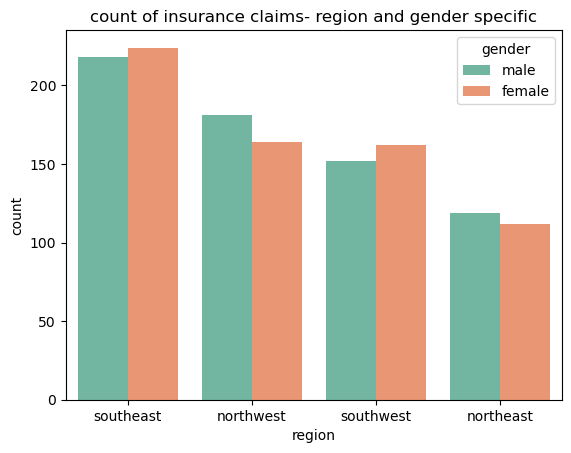

In [ ]:
sns.countplot(x='region', hue='gender', palette="Set2", data=data).set(title='count of insurance claims- region and gender specific')

below shows the variations of count of claims and age of claimants of each gender

[Text(0.5, 1.0, 'count of insurace claims - gender and age specific')]

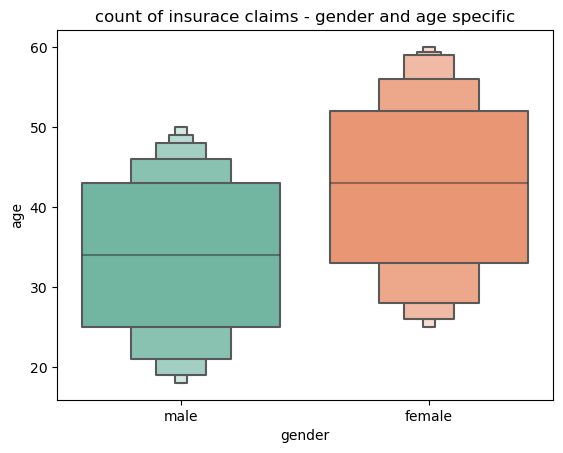

In [76]:
sns.boxenplot(x='gender', y='age', palette="Set2", data=data).set(title='count of insurace claims - gender and age specific')

now we will see the histogram represenatation of age, bmi, bp, no. of claims to see if distribution is equal/equal/positive or negative skew

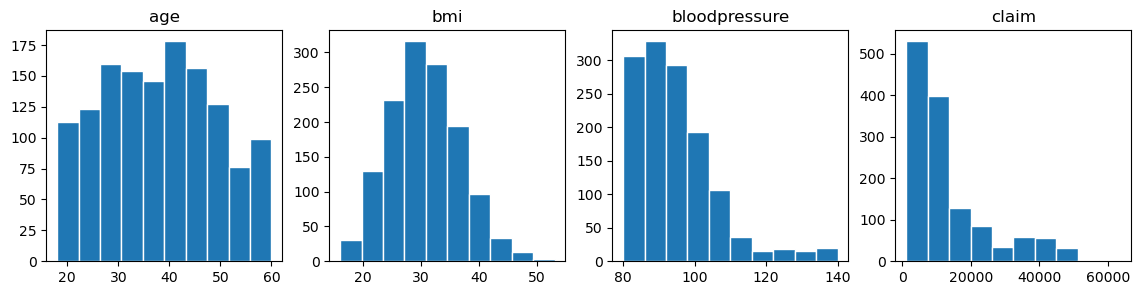

In [87]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))
age = data.age.hist(ax=axes[0], ec="white", grid=False).set_title('age')
bmi = data.bmi.hist(ax=axes[1],  ec="white", grid=False).set_title('bmi')
bloodpressure = data.bloodpressure.hist(ax=axes[2],  ec="white", grid=False).set_title('bloodpressure')
claim = data.claim.hist(ax=axes[3],  ec="white", grid=False).set_title('claim')

we will use scatterplot function of seaborn to see the relation of claim value with respect to age and smoking habit

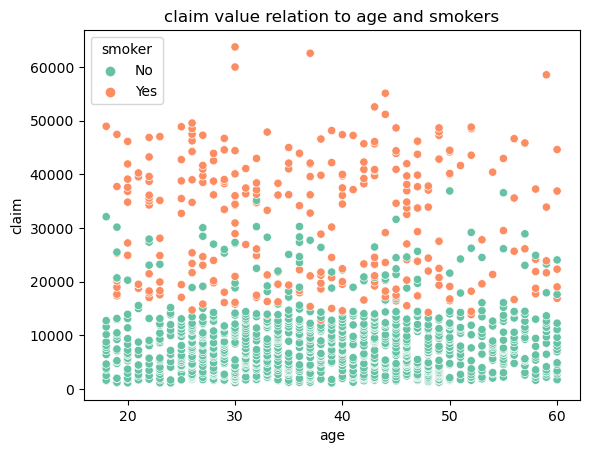

In [94]:
sns.scatterplot(x='age', y='claim', hue='smoker', palette="Set2", data=data).set(title='claim value relation to age and smokers')
plt.show()

and the same we will check to see the relation to diabetic claimants

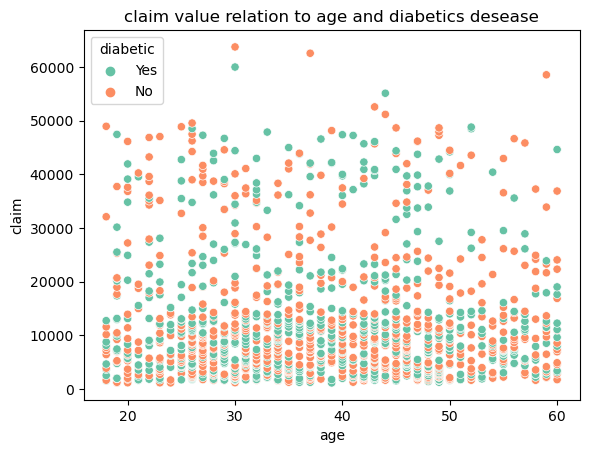

In [95]:
sns.scatterplot(x='age', y='claim', hue='diabetic', palette="Set2", data=data).set(title='claim value relation to age and diabetics desease')
plt.show()

we will check number of claims - region wise

In [98]:
regions = data[['region', 'claim']].groupby('region').sum().sort_values(by="claim", ascending=True)
regions

,claim
region,
northeast,3901369.33
southwest,3995062.77
northwest,4069006.54
southeast,5783789.60


array([<AxesSubplot:ylabel='claim'>], dtype=object)

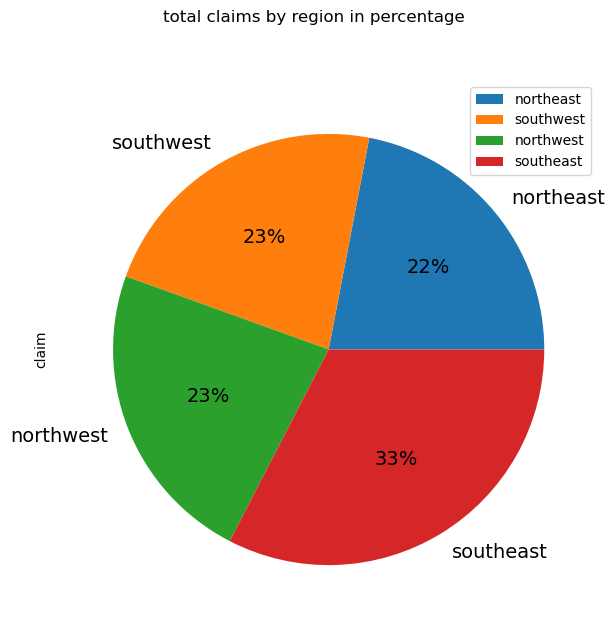

In [105]:
regions.plot(kind='pie', subplots=True, figsize=(12,7), fontsize = 14,  title='total claims by region in percentage',autopct='%1.0f%%')